In [2]:
bzone = bz.get_BZ([1.0135910693,0.0000000000,0.0865508779], [0.0000000000, 1.0007561160, 0.0000000000], [0.0000000000, 0.0000000000, 0.7366345048])

{"triangles_vertices": [[-0.4790401062919598, -0.5003780579999999, -0.3683172524000002], [-0.5345509630080403, -0.5003780580000001, 0.28176637449999997], [-0.4790401062919599, -0.5003780580000002, 0.36831725240000046], [0.47904010629195987, -0.5003780579999999, 0.3683172524], [0.47904010629195964, -0.5003780579999999, -0.3683172524000004], [0.5345509630080402, -0.5003780579999999, -0.28176637449999986], [0.5345509630080404, 0.5003780579999999, -0.28176637449999986], [-0.5345509630080403, 0.5003780579999999, 0.2817663745], [0.47904010629195987, 0.5003780579999999, 0.3683172524], [-0.4790401062919598, 0.5003780579999997, 0.3683172523999998], [-0.47904010629196003, 0.5003780580000001, -0.36831725240000013], [0.47904010629195976, 0.500378058, -0.3683172524]], "triangles": [[4, 0, 11], [11, 0, 10], [4, 11, 5], [5, 11, 6], [10, 0, 7], [7, 0, 1], [2, 5, 3], [2, 0, 4], [1, 0, 2], [4, 5, 2], [9, 7, 2], [2, 7, 1], [6, 11, 8], [8, 11, 10], [8, 7, 9], [10, 7, 8], [8, 5, 6], [3, 5, 8], [8, 2, 3], [

<IPython.core.display.Javascript object>


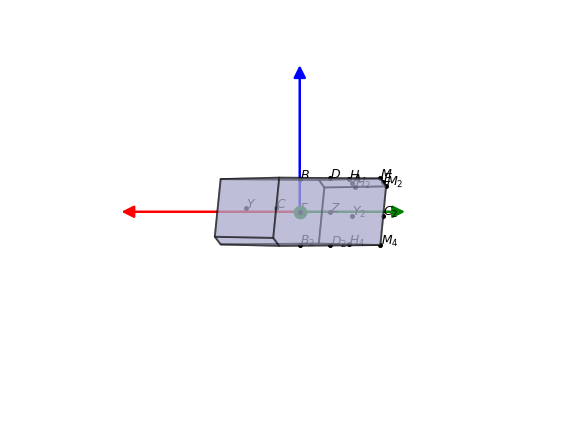

In [87]:
%matplotlib notebook
from pylab import figure, show
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from collections import defaultdict

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

##SC
# faces_data = get_BZ(b1 = [1,0,0], b2 = [0,1,0], b3 = [0,0,1])
##BCC
# faces_data = get_BZ(b1 = [1,1,0], b2 = [1,0,1], b3 = [0,1,1])
##FCC
faces_data = bz.get_BZ([1.0135910693,0.0000000000,0.0865508779], [0.0000000000, 1.0007561160, 0.0000000000], [0.0000000000, 0.0000000000, 0.7366345048])

import json

with open('json_pts.txt', 'r') as f:
    ptsdict = json.load(f)

ptsdict['kpoints']

def sphere(x, y, z):
    ax.scatter([x], [y], [z], color="k", s=9)
    
def kpts(ptsdict):
    pts = ptsdict['kpoints']
    for p in pts:
        sphere(*pts[p])
        
def labels(points):
    pts = ptsdict['kpoints']
    for p in pts:
        coord = pts[p]
        l = '$'+p+'$'
        if p == 'GAMMA':
            l = '$\Gamma$'
        ax.text(*coord, l, (1,0,0))
    

print(json.dumps(faces_data))

faces_coords = faces_data["faces"]

faces_count = defaultdict(int)
for face in faces_coords:
    faces_count[len(face)] += 1

for num_sides in sorted(faces_count.keys()):
    print("{} faces: {}".format(num_sides, faces_count[num_sides]))

fig = figure()
ax = fig.add_subplot(111, projection="3d")
ax.add_collection3d(
    Poly3DCollection(
        faces_coords, linewidth=1.5, alpha=0.5, edgecolor="k", facecolor="#aaaaccff"
    )
)

# draw origin
ax.scatter([0], [0], [0], color="g", s=100)

axes_length = 2
# Add axes
ax.add_artist(
    Arrow3D(
        (0, axes_length/1.2),
        (0, 0),
        (0, 0),
        mutation_scale=20,
        lw=2,
        arrowstyle="-|>",
        color="r",
    )
)
ax.add_artist(
    Arrow3D(
        (0, 0),
        (0, axes_length/1.2),
        (0, 0),
        mutation_scale=20,
        lw=2,
        arrowstyle="-|>",
        color="g",
    )
)
ax.add_artist(
    Arrow3D(
        (0, 0),
        (0, 0),
        (0, axes_length/1.2),
        mutation_scale=20,
        lw=2,
        arrowstyle="-|>",
        color="b",
    )
)

kpts(ptsdict)
labels(ptsdict)


## Reset limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.axis("off")
ax.view_init(elev=0, azim=60)

show()

In [72]:
ptsdict['kpoints']

{'C': [0.5067955346475584, 0.5003780579754946, 0.04327543896684744],
 'M_4': [-0.4790401062802754, 0.5003780579754946, -0.3683172523969821],
 'E': [-0.5067955346475584, 0.5003780579754946, 0.32504181343013466],
 'M': [-0.4790401062802754, 0.5003780579754946, 0.36831725239698215],
 'H_2': [-0.5345509630148415, 0.0, 0.28176637446328723],
 'Y': [0.5067955346475584, 0.0, 0.04327543896684744],
 'Y_2': [-0.5067955346475584, 0.0, -0.04327543896684744],
 'A': [-0.5067955346475584, 0.0, 0.32504181343013466],
 'GAMMA': [0.0, 0.0, 0.0],
 'H': [-0.4790401062802754, 0.0, 0.36831725239698215],
 'D': [0.0, 0.5003780579754946, 0.3683172523969821],
 'M_2': [-0.5345509630148415, 0.5003780579754946, 0.28176637446328723],
 'B': [0.0, 0.0, 0.3683172523969821],
 'Z': [0.0, 0.5003780579754946, 0.0],
 'H_4': [-0.4790401062802754, 0.0, -0.3683172523969821],
 'B_2': [0.0, 0.0, -0.3683172523969821],
 'C_2': [-0.5067955346475584, 0.5003780579754946, -0.04327543896684744],
 'D_2': [0.0, 0.5003780579754946, -0.3683

{'C': [0.5067955346475584, 0.5003780579754946, 0.04327543896684744],
 'M_4': [-0.4790401062802754, 0.5003780579754946, -0.3683172523969821],
 'E': [-0.5067955346475584, 0.5003780579754946, 0.32504181343013466],
 'M': [-0.4790401062802754, 0.5003780579754946, 0.36831725239698215],
 'H_2': [-0.5345509630148415, 0.0, 0.28176637446328723],
 'Y': [0.5067955346475584, 0.0, 0.04327543896684744],
 'Y_2': [-0.5067955346475584, 0.0, -0.04327543896684744],
 'A': [-0.5067955346475584, 0.0, 0.32504181343013466],
 'GAMMA': [0.0, 0.0, 0.0],
 'H': [-0.4790401062802754, 0.0, 0.36831725239698215],
 'D': [0.0, 0.5003780579754946, 0.3683172523969821],
 'M_2': [-0.5345509630148415, 0.5003780579754946, 0.28176637446328723],
 'B': [0.0, 0.0, 0.3683172523969821],
 'Z': [0.0, 0.5003780579754946, 0.0],
 'H_4': [-0.4790401062802754, 0.0, -0.3683172523969821],
 'B_2': [0.0, 0.0, -0.3683172523969821],
 'C_2': [-0.5067955346475584, 0.5003780579754946, -0.04327543896684744],
 'D_2': [0.0, 0.5003780579754946, -0.3683

In [51]:
pts = ptsdict['kpoints']
for p in pts:
    print(pts[p])
        

[0.5067955346475584, 0.5003780579754946, 0.04327543896684744]
[-0.4790401062802754, 0.5003780579754946, -0.3683172523969821]
[-0.5067955346475584, 0.5003780579754946, 0.32504181343013466]
[-0.4790401062802754, 0.5003780579754946, 0.36831725239698215]
[-0.5345509630148415, 0.0, 0.28176637446328723]
[0.5067955346475584, 0.0, 0.04327543896684744]
[-0.5067955346475584, 0.0, -0.04327543896684744]
[-0.5067955346475584, 0.0, 0.32504181343013466]
[0.0, 0.0, 0.0]
[-0.4790401062802754, 0.0, 0.36831725239698215]
[0.0, 0.5003780579754946, 0.3683172523969821]
[-0.5345509630148415, 0.5003780579754946, 0.28176637446328723]
[0.0, 0.0, 0.3683172523969821]
[0.0, 0.5003780579754946, 0.0]
[-0.4790401062802754, 0.0, -0.3683172523969821]
[0.0, 0.0, -0.3683172523969821]
[-0.5067955346475584, 0.5003780579754946, -0.04327543896684744]
[0.0, 0.5003780579754946, -0.3683172523969821]
